<a href="https://colab.research.google.com/github/kwangwonland/kfq_ML_2023/blob/main/0710_RNN11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

강의 교재 : https://wikibook.co.kr/mymlrev/

## 앞으로 삼성 응원하세요!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, SimpleRNN
from keras.layers import Embedding
from keras import models
from keras.datasets import imdb
from keras.utils import pad_sequences

In [3]:
(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=30000)

In [4]:
max(max(x_test))

29894

In [5]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [6]:
word_dic = imdb.get_word_index()

1641221/1641221 [==============================] - 0s 0us/step


In [7]:
word_dic['hello']

4822

In [8]:
index_dic = {}
for key,value in word_dic.items():
    index_dic[value] = key

In [9]:
index_dic[4822]

'hello'

In [10]:
for i in x_train[0]:
    print(index_dic[i],end=' ')

the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room titillate it so heart shows to years of every never going villaronga help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but pratfalls to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other tricky in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of 'n odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from

In [11]:
index_dic[1], index_dic[2], index_dic[3]

('the', 'and', 'a')

In [12]:
for i in range(10):
    print(len(x_train[i]),end=' ')

218 189 141 550 147 43 123 562 233 130 

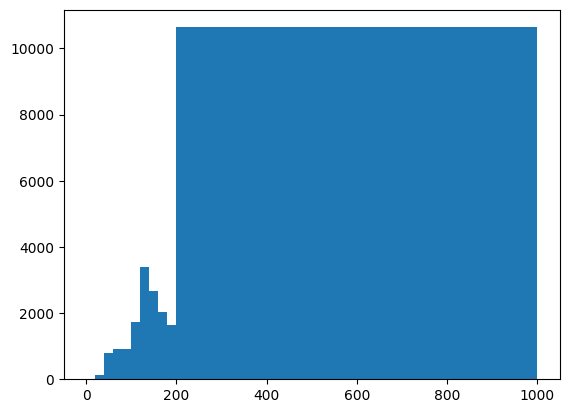

In [13]:
ls = [len(x_train[i]) for i in range(len(x_train))]
plt.hist(ls,bins=[0,20,40,60,80,100,120,140,160,180,200,1000])
plt.show()

In [4]:
xseq_train = pad_sequences(x_train,maxlen=200)
xseq_test = pad_sequences(x_test,maxlen=200)

In [15]:
|for i in range(10):
    print(len(xseq_train[i]),end=' ')

200 200 200 200 200 200 200 200 200 200 

In [16]:
xseq_train[5]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [17]:
xseq_train.shape, xseq_test.shape

((25000, 200), (25000, 200))

In [18]:
model = keras.Sequential()
rnn = SimpleRNN(20,input_shape=(50,500))
dense = Dense(1,activation='sigmoid')
model.add(rnn)
model.add(dense)

In [ ]:
xo_train = keras.utils.to_categorical(xseq_train)
xo_test = keras.utils.to_categorical(xseq_test)

In [ ]:
xo_train.shape

In [ ]:
model.compile(loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [ ]:
cp = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
hist = model.fit(xo_train, y_train, callbacks=[cp], validation_split=0.2, epochs=100)

In [11]:
model=keras.Sequential()
em=Embedding(30000,16,input_length=200)
rnn=SimpleRNN(20)
dense=Dense(1,activation='sigmoid')
model.add(em)
model.add(rnn)
model.add(dense)

In [12]:
model.compile(loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [13]:
cp = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
hist = model.fit(xseq_train, y_train, callbacks=[cp], validation_split=0.2, epochs=1000)

Epoch 1/1000
625/625 [==============================] - 29s 45ms/step - loss: 0.5515 - accuracy: 0.7072 - val_loss: 0.4021 - val_accuracy: 0.8300
Epoch 2/1000
625/625 [==============================] - 27s 43ms/step - loss: 0.3551 - accuracy: 0.8526 - val_loss: 0.3736 - val_accuracy: 0.8360
Epoch 3/1000
625/625 [==============================] - 27s 43ms/step - loss: 0.2807 - accuracy: 0.8894 - val_loss: 0.3578 - val_accuracy: 0.8488
Epoch 4/1000
625/625 [==============================] - 27s 43ms/step - loss: 0.2325 - accuracy: 0.9102 - val_loss: 0.4206 - val_accuracy: 0.8434
Epoch 5/1000
625/625 [==============================] - 27s 43ms/step - loss: 0.2030 - accuracy: 0.9248 - val_loss: 0.3444 - val_accuracy: 0.8574
Epoch 6/1000
625/625 [==============================] - 27s 43ms/step - loss: 0.1638 - accuracy: 0.9404 - val_loss: 0.3610 - val_accuracy: 0.8610
Epoch 7/1000
625/625 [==============================] - 27s 43ms/step - loss: 0.1383 - accuracy: 0.9500 - val_loss: 0.4024 -

In [9]:
xseq_train.shape

(25000, 200)

In [10]:
y_train.shape

(25000,)

In [15]:
plt.plot(hist['loss'],label='loss')
plt.plot(hist['val_loss'],label='val_loss')
plt.show()

TypeError: ignored

In [8]:
model=keras.Sequential()
em=Embedding(30000,16,input_length=200)
rnn=SimpleRNN(20)
dense=Dense(1,activation='sigmoid')
model.add(em)
model.add(rnn)
model.add(keras.layers.Dropout(0.3))
model.add(dense)
model.compile(loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [7]:
model.compile(loss=keras.losses.binary_crossentropy, metrics=['accuracy'])
cp = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
hist = model.fit(xseq_train, y_train, callbacks=[cp], validation_split=0.2, epochs=1000)

Epoch 1/1000
625/625 [==============================] - 34s 52ms/step - loss: 0.5943 - accuracy: 0.6592 - val_loss: 0.4226 - val_accuracy: 0.8194
Epoch 2/1000
625/625 [==============================] - 27s 44ms/step - loss: 0.3667 - accuracy: 0.8485 - val_loss: 0.3920 - val_accuracy: 0.8240
Epoch 3/1000
625/625 [==============================] - 28s 45ms/step - loss: 0.2935 - accuracy: 0.8861 - val_loss: 0.4221 - val_accuracy: 0.8160
Epoch 4/1000
625/625 [==============================] - 29s 46ms/step - loss: 0.2474 - accuracy: 0.9085 - val_loss: 0.3493 - val_accuracy: 0.8672
Epoch 5/1000
625/625 [==============================] - 30s 48ms/step - loss: 0.2130 - accuracy: 0.9225 - val_loss: 0.3909 - val_accuracy: 0.8584
Epoch 6/1000
281/625 [============>.................] - ETA: 14s - loss: 0.1654 - accuracy: 0.9408

KeyboardInterrupt: ignored

In [ ]:
tl=len(xseq_train)
for i in range(2500):
    xtemp=xseq_train[i*10:(i+1)*10]
    xo_train=keras.utils.to_categorical(xtemp,num_classes=30000)
    yo_train=y_train[i*10:(i+1)*10]

In [9]:
for e in range(10):
  print("###e:",e+1)
  for i in range(2500):
    xtemp = xseq_train[i*10:(i+1)*10]
    xo_train = keras.utils.to_categorical(xtemp,
                                        num_classes=30000)
    yo_train = y_train[i*10:(i+1)*10]
    model.fit(xo_train,yo_train,validation_split=0.1)
    del xo_train

###e: 1


ValueError: ignored

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, SimpleRNN,Dropout
from keras.layers import Embedding
from keras import models
from keras.datasets import imdb
from keras.utils import pad_sequences
import gc

(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=30000)
xseq_train = pad_sequences(x_train,maxlen=150)
xseq_test = pad_sequences(x_test,maxlen=150)

model = keras.Sequential()
rnn = SimpleRNN(20,input_shape=(150,30000))
drop = Dropout(0.6)
dense = Dense(1,activation='sigmoid')
model.add(rnn)
model.add(drop)
model.add(dense)
model.compile(loss = keras.losses.binary_crossentropy)
es = keras.callbacks.EarlyStopping(patience=10,
                                   restore_best_weights=True)
cp = keras.callbacks.ModelCheckpoint('cp.h5',save_best_only=True)

for i in range(250):
  print(i,end=' ')
  xtemp = xseq_train[i*100:(i+1)*100]
  xo_train = keras.utils.to_categorical(xtemp,
                                        num_classes=30000)
  yo_train = y_train[i*100:(i+1)*100]
  model.fit(xo_train,yo_train,validation_split=0.1,verbose=0)
  del xo_train
  print(gc.get_count())
  gc.collect()
i=0
xo_temp = xseq_test[i*100:(i+1)*100]
yo_test = y_test[i*100:(i+1)*100]
model.evaluate(xo_temp,yo_test)

0 (137, 8, 15)
1 (99, 3, 0)
2 (121, 3, 0)
3 (109, 3, 0)
4 (108, 3, 0)
5 (84, 3, 0)
6 (242, 3, 0)
7 (123, 3, 0)
8 (121, 3, 0)
9 (75, 3, 0)
10 (73, 3, 0)
11 (114, 3, 0)
12 (112, 3, 0)
13 (75, 3, 0)
14 (63, 3, 0)
15 (73, 3, 0)
16 (116, 3, 0)
17 (110, 3, 0)
18 (104, 3, 0)
19 (108, 3, 0)
20 (65, 3, 0)
21 (78, 3, 0)
22 (101, 3, 0)
23 (240, 3, 0)
24 (114, 3, 0)
25 (86, 3, 0)
26 (73, 3, 0)
27 (79, 3, 0)
28 (242, 3, 0)
29 (327, 3, 0)
30 (56, 3, 0)
31 (53, 3, 0)
32 (80, 3, 0)
33 (108, 3, 0)
34 (116, 3, 0)
35 (240, 3, 0)
36 (323, 3, 0)
37 (73, 3, 0)
38 (171, 3, 0)
39 (116, 3, 0)
40 (121, 3, 0)
41 (100, 3, 0)
42 (74, 3, 0)
43 (135, 3, 0)
44 (116, 3, 0)
45 (240, 3, 0)
46 (100, 3, 0)
47 (73, 3, 0)
48 (329, 3, 0)
49 (248, 3, 0)
50 (247, 3, 0)
51 (80, 3, 0)
52 (80, 3, 0)
53 (242, 3, 0)
54 (121, 3, 0)
55 (53, 3, 0)
56 (83, 3, 0)
57 (112, 3, 0)
58 (131, 3, 0)
59 (305, 3, 0)
60 (116, 3, 0)
61 (83, 3, 0)
62 (212, 3, 0)
63 (109, 3, 0)
64 (73, 3, 0)
65 (117, 3, 0)
66 (114, 3, 0)
67 (121, 3, 0)
68 (78, 3, 0)

ValueError: ignored